In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time
import matplotlib.pyplot as plt
import numpy as np


Epoch 1/5


2023-02-21 19:12:07.982912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1625/1875 [=========================>....] - ETA: 1s - loss: 0.2112 - accuracy: 0.9360

KeyboardInterrupt: 

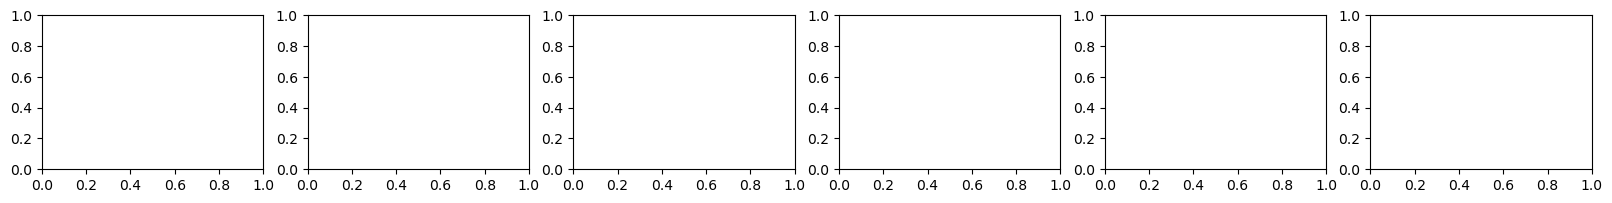

In [7]:
# Load and preprocess the dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Get the layer outputs and names
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
img = test_images[0]
activations = activation_model.predict(np.expand_dims(img, axis=0))
layer_names = [layer.name for layer in model.layers]

# Display the layer outputs as images
fig, axs = plt.subplots(nrows=1, ncols=len(layer_names), figsize=(20, 2))
# Get the activations for the first image in the test set
activations = activation_model.predict(test_images[0].reshape(1, 28, 28, 1))

# Extract the activations of the Conv2D layer
conv_activation = activations[0]

# Create a grid of subplots to display the filters
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))

# Iterate over each filter and plot it on a separate subplot
for i in range(conv_activation.shape[-1]):
    row, col = divmod(i, 8)
    axs[row, col].imshow(conv_activation[0, :, :, i], cmap='gray')
    axs[row, col].axis('off')
    
plt.show()
# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# Get the layer outputs and names
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
img = test_images[0]
activations = activation_model.predict(np.expand_dims(img, axis=0))
layer_names = [layer.name for layer in model.layers]

# Display the layer outputs as images
fig, axs = plt.subplots(nrows=1, ncols=len(layer_names), figsize=(20, 2))
# Get the activations for the first image in the test set
activations = activation_model.predict(test_images[0].reshape(1, 28, 28, 1))

# Extract the activations of the Conv2D layer
conv_activation = activations[0]

# Create a grid of subplots to display the filters
fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(12, 6))

# Iterate over each filter and plot it on a separate subplot
for i in range(conv_activation.shape[-1]):
    row, col = divmod(i, 8)
    axs[row, col].imshow(conv_activation[0, :, :, i], cmap='gray')
    axs[row, col].axis('off')
    
plt.show()




In [3]:
total_time = end_time - start_time
print(f'Total time elapsed during training: {total_time:.2f} seconds')
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Total time elapsed during training: 138.10 seconds
313/313 [==============================] - 4s 11ms/step - loss: 0.2456 - accuracy: 0.9297
Test accuracy: 0.9297000169754028
Test loss: 0.24560381472110748
